In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("spam.csv")
df['target_num'] = df['target'].map({'ham': 0, 'spam': 1})

## TF-IDF Vectorization

In [3]:
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(df['text'])

## PCA Application

In [18]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_tfidf.toarray())
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

# Classification Models

## K-Means 

In [19]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_pca)

## Hierarchical Clustering

In [20]:
agglo = AgglomerativeClustering(n_clusters=2)
df['hier_cluster'] = agglo.fit_predict(X_pca)

## Plots

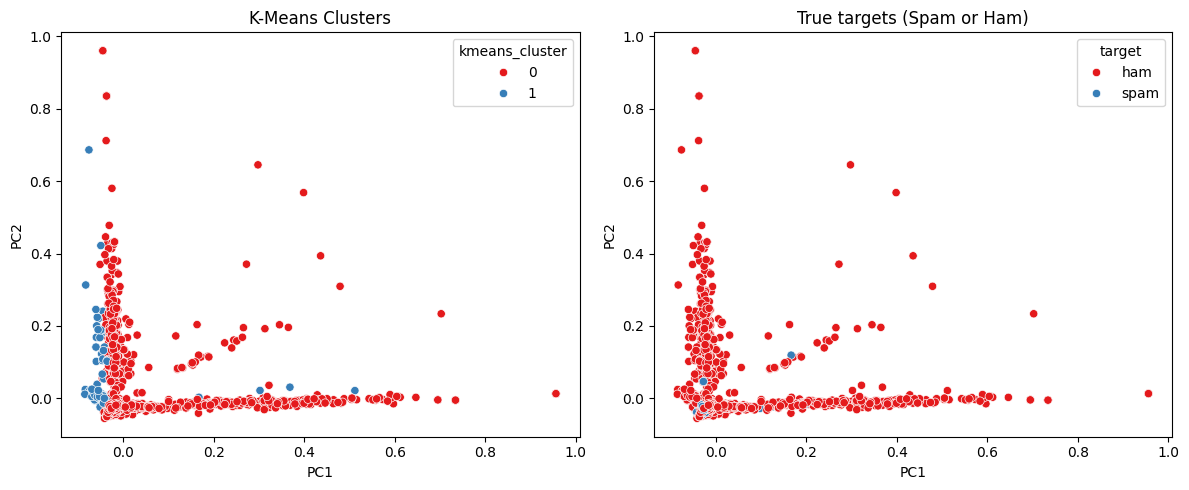

In [13]:
plt.figure(figsize=(12, 5))

# K-Means Clusters
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='PC1', y='PC2', hue='kmeans_cluster', palette='Set1')
plt.title("K-Means Clusters")

# True targets
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='PC1', y='PC2', hue='target', palette='Set1')
plt.title("True targets (Spam or Ham)")

plt.tight_layout()
plt.show()

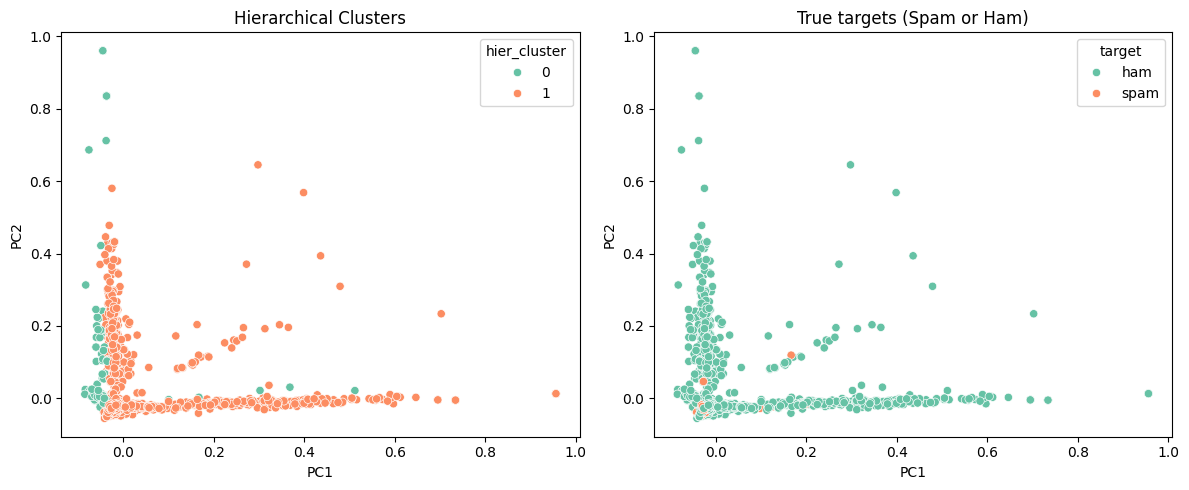

In [14]:
plt.figure(figsize=(12, 5))

# Hierarchical Clusters
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='PC1', y='PC2', hue='hier_cluster', palette='Set2')
plt.title("Hierarchical Clusters")

# True targets
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='PC1', y='PC2', hue='target', palette='Set2')
plt.title("True targets (Spam or Ham)")

plt.tight_layout()
plt.show()